# Pymaceuticals Inc.
---

### Analysis
From the first bar graph we can see that Capomulin has the greatest life expectancy 

Capomulin shows to actually decrease the tumor volume overall in our line graph for mouse id l509 even with points the mouse seems to regress it seems to lower back down every time

lastly from our correlation coefficient and a linear regression model we can see that a higher weight seems to impact tumor volume, it would be benificial to watch weight and try to keep it on the lower end for better performance

- Add your analysis here.
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_df = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
complete_df["Mouse ID"].nunique()

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = complete_df.loc[complete_df.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_df.loc[complete_df["Mouse ID"] == "g989"]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
new_clean = complete_df[complete_df["Mouse ID"].isin(duplicate_mice) == False]
new_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
len(new_clean["Mouse ID"].unique())

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
mean_tumor_df = new_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_df = new_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor_df = new_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_df = new_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_df = new_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume":mean_tumor_df,
    "Median Tumor Volume":median_tumor_df,
    "Tumor Volume Variance":var_tumor_df,
    "Tumor Volume Std. Dev.":std_tumor_df,
    "Tumor Volume Std. Err.":sem_tumor_df
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = new_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

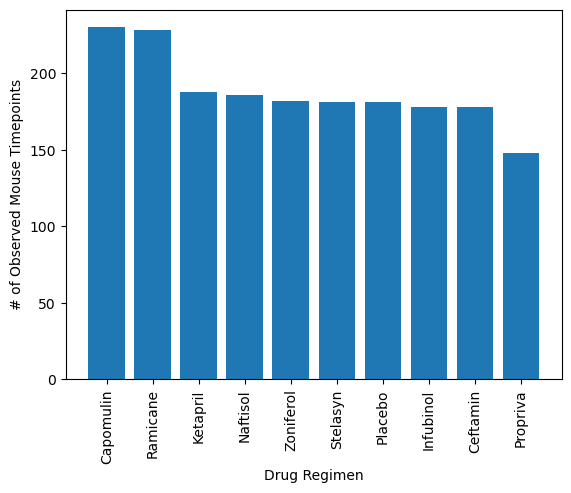

In [25]:
reg_counts = new_clean["Drug Regimen"].value_counts()
plt.bar(reg_counts.index, reg_counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

In [19]:
gender = new_clean.groupby("Sex")["Mouse ID"].nunique()
gender

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'count')

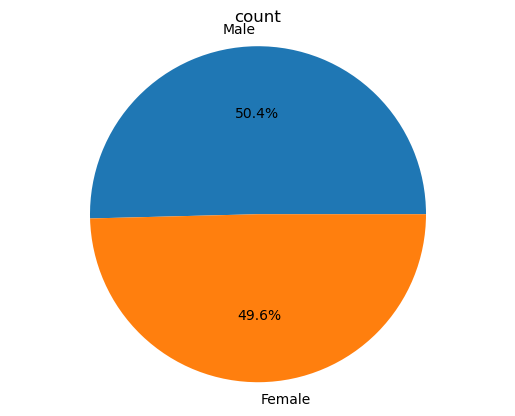

In [20]:
mouse_gender = ["Male", "Female"]
gender_counts = [ 125, 123]
plt.pie(gender_counts, labels=mouse_gender, autopct="%1.1f%%")
plt.axis("equal")
plt.title("count")

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time = new_clean.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data = pd.merge(new_clean, time)
data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volume
    subset = data[data["Drug Regimen"] == treatment]
    tumor_vol.append(subset["Tumor Volume (mm3)"].values)

    # Locate the rows which contain mice on each drug and get the tumor volume
    quartiles = subset["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Print out the results
    print(f"{treatment} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Identify outliers
    outliers = subset.loc[(subset["Tumor Volume (mm3)"] < lower_bound) | (subset["Tumor Volume (mm3)"] > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers["Tumor Volume (mm3)"].values}")


Capomulin - Lower Bound: 20.70456164999999, Upper Bound: 51.83201549
Potential outliers for Capomulin: []
Ramicane - Lower Bound: 17.912664470000003, Upper Bound: 54.30681135
Potential outliers for Ramicane: []
Infubinol - Lower Bound: 36.83290494999999, Upper Bound: 82.74144559000001
Potential outliers for Infubinol: [36.3213458]
Ceftamin - Lower Bound: 25.355449580000002, Upper Bound: 87.66645829999999
Potential outliers for Ceftamin: []


{'whiskers': [<matplotlib.lines.Line2D at 0x2e9239c1fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e9239c2510>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e9239c1d90>,
 'medians': [<matplotlib.lines.Line2D at 0x2e9239c2ab0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2e9239c2d80>,
 'means': []}

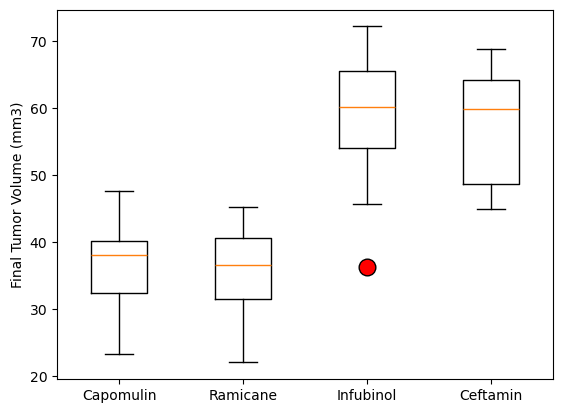

In [36]:
orange_out = dict(markerfacecolor='red',markersize=12)
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol, labels=treatments, flierprops=orange_out)

## Line and Scatter Plots

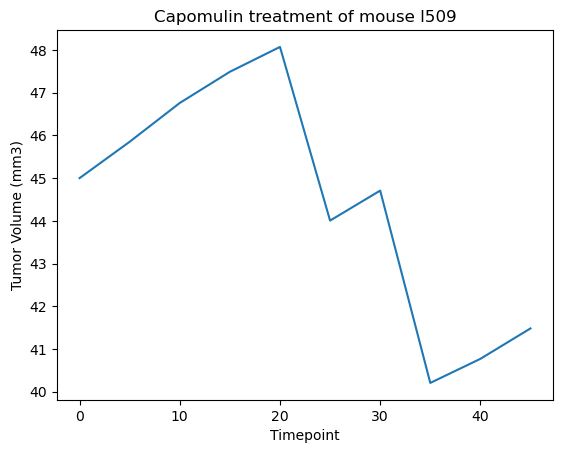

In [45]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo = new_clean.loc[new_clean["Drug Regimen"] == "Capomulin"]
mouse_data = capo.loc[capo["Mouse ID"] == "l509"]
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

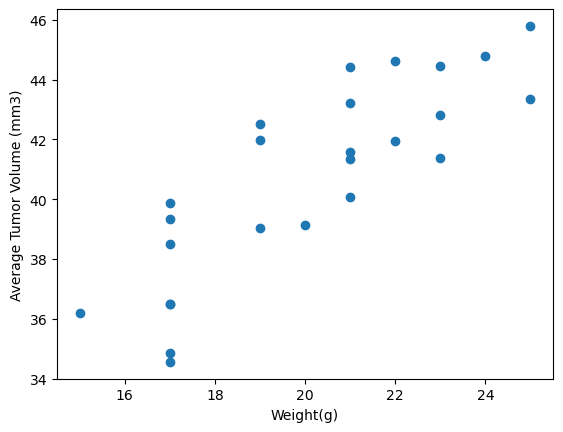

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_reg = new_clean.loc[new_clean["Drug Regimen"] == "Capomulin"]
tumor_vol = cap_reg.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
plt.scatter(tumor_vol["Weight (g)"], tumor_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient is: 0.8419363424694722


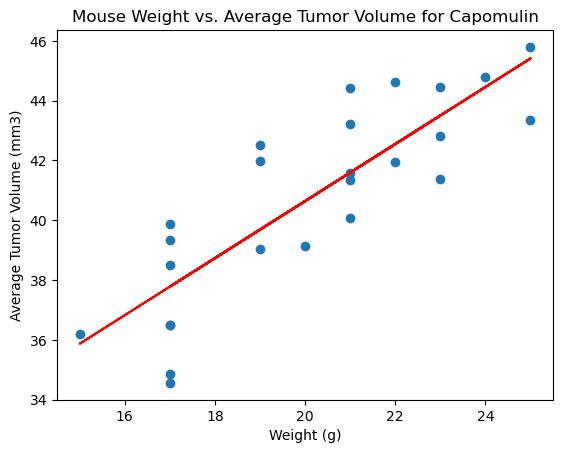

The linear regression model is: y = 0.95x + 21.55
The r-squared value is: 0.71


In [50]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
from scipy.stats import linregress
correlation = tumor_vol["Weight (g)"].corr(tumor_vol["Tumor Volume (mm3)"])
print(f"The correlation coefficient is: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(tumor_vol["Weight (g)"], tumor_vol["Tumor Volume (mm3)"])

# Create regression values
regression_values = slope * tumor_vol["Weight (g)"] + intercept

# Plot the scatter plot with the regression line
plt.scatter(tumor_vol["Weight (g)"], tumor_vol["Tumor Volume (mm3)"])
plt.plot(tumor_vol["Weight (g)"], regression_values, color='red')  # Add regression line
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin")
plt.show()

print(f"The linear regression model is: y = {slope:.2f}x + {intercept:.2f}")
print(f"The r-squared value is: {r_value**2:.2f}")